In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
df=pd.read_csv("netflix_titles.csv")


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [116]:
print(df.shape)


(8807, 12)


In [117]:
print(df.columns.to_list())

['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


In [118]:
print(df.duplicated().sum())

0


In [119]:
df['date_added'] = df['date_added'].str.strip()




In [120]:
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed', errors='coerce')
df['date_added']=pd.to_datetime(df['date_added'])

In [121]:

df['director']=df['director'].fillna('Unknown')
df['cast']=df['cast'].fillna('Unknown')
df['country']=df['country'].fillna('Unknown')



In [122]:
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])


In [123]:
df= df.dropna(subset=['date_added', 'duration'])


In [124]:
print(df.isnull().sum())

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


In [125]:
df.columns
print(df.dtypes)

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object


In [126]:
df['duration'].head(10)

0       90 min
1    2 Seasons
2     1 Season
3     1 Season
4    2 Seasons
5     1 Season
6       91 min
7      125 min
8    9 Seasons
9      104 min
Name: duration, dtype: object

In [127]:
df['duration_type'] = df['duration'].apply(lambda x: 'Season' if 'Season' in x else 'Minute')


In [128]:
df['duration_int'] = df['duration'].str.extract('(\d+)').astype(int)


<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\s\AppData\Local\Temp\ipykernel_6652\479287164.py:1: SyntaxWarning: invalid escape sequence '\d'
  df['duration_int'] = df['duration'].str.extract('(\d+)').astype(int)


In [129]:
df[['duration','duration_type','duration_int']].head()


,duration,duration_type,duration_int
0,90 min,Minute,90
1,2 Seasons,Season,2
2,1 Season,Season,1
3,1 Season,Season,1
4,2 Seasons,Season,2


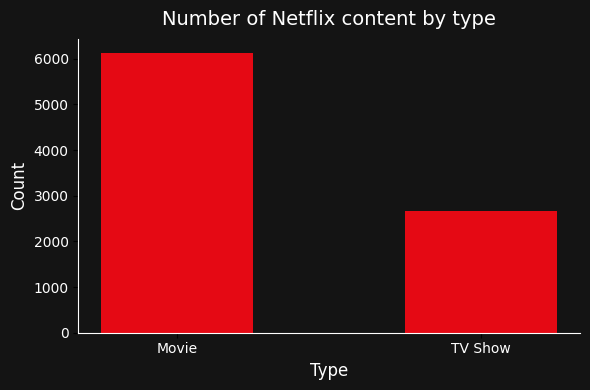

In [130]:


# داده‌ها
type_counts = df['type'].value_counts()


plt.figure(figsize=(6,4), facecolor="#141414")


bars = plt.bar(type_counts.index, type_counts.values, 
               color="#E50914", width=0.5)


plt.title("Number of Netflix content by type", color="white", fontsize=14, pad=10)
plt.xlabel("Type", color="white", fontsize=12)
plt.ylabel("Count", color="white", fontsize=12)

plt.xticks(color="white", fontsize=10)
plt.yticks(color="white", fontsize=10)

ax = plt.gca()
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
ax.spines['bottom'].set_color("white")
ax.spines['left'].set_color("white")
ax.set_facecolor("#141414")

plt.tight_layout()
plt.show()


In [131]:
df['added_year']=df['date_added'].dt.year


Counting the number of content per year

In [132]:
YearCounts=df['added_year'].value_counts().sort_index()

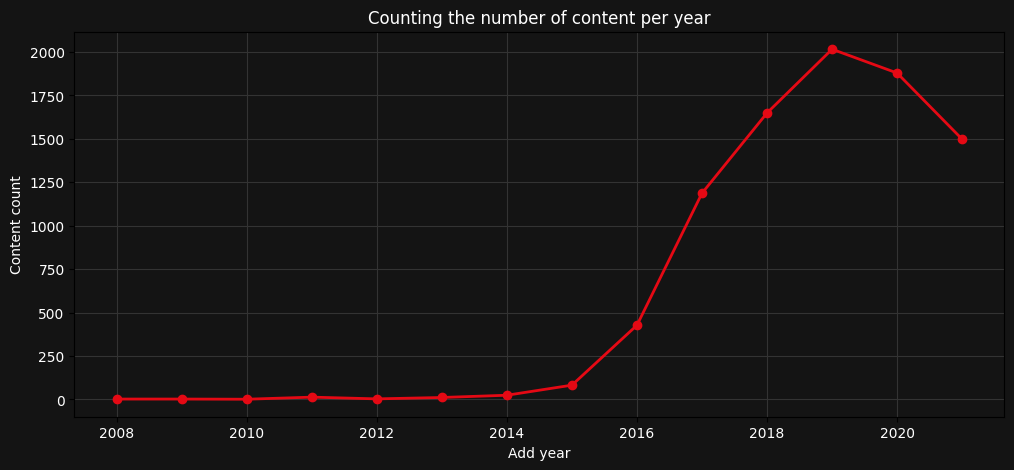

In [133]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5), facecolor="#141414")
plt.plot(YearCounts.index, YearCounts.values, marker='o', color="#E50914", linewidth=2)

plt.title("Counting the number of content per year", color="white")
plt.xlabel("Add year", color="white")
plt.ylabel("Content count", color="white")

plt.xticks(color="white")
plt.yticks(color="white")

plt.grid(True, color="#333333")  # شبکه‌ی ظریف خاکستری تیره
plt.gca().set_facecolor("#141414")

plt.show()



In [134]:
df['genres'] = df['listed_in'].str.split(', ')
genres_df = df.explode('genres')


In [135]:
genre_counts = genres_df['genres'].value_counts()


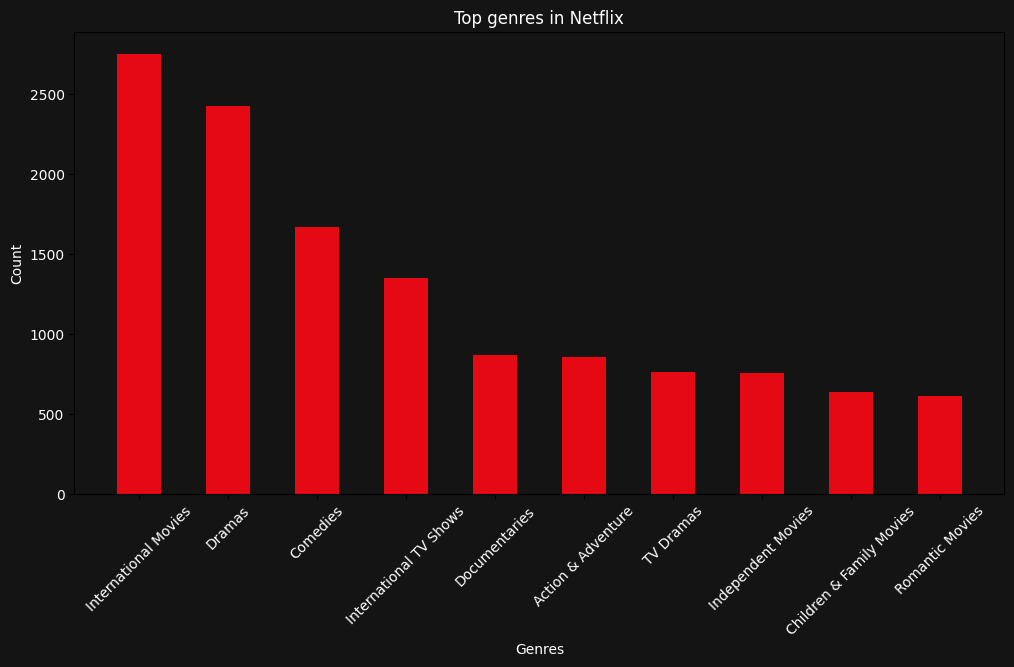

In [136]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6), facecolor="#141414")
plt.bar(genre_counts.index[:10], genre_counts.values[:10], color="#E50914", width=0.5)

plt.title("Top genres in Netflix", color="white")
plt.xlabel("Genres", color="white")
plt.ylabel("Count", color="white")

plt.xticks(rotation=45, color="white")
plt.yticks(color="white")
plt.gca().set_facecolor("#141414")

plt.show()



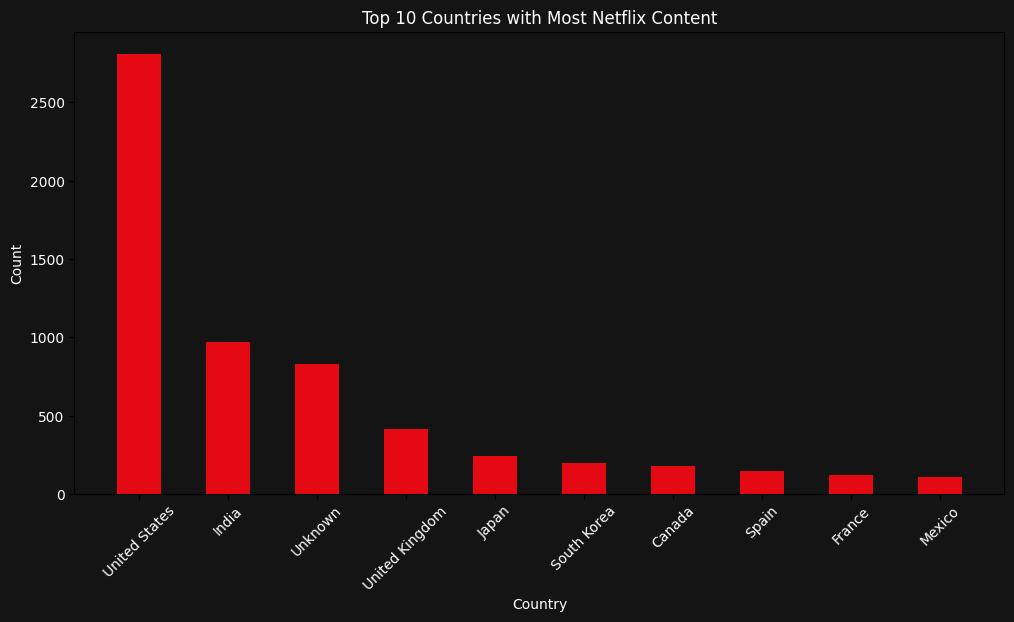

In [137]:


PopularCountries = df['country'].value_counts().head(10)

plt.figure(figsize=(12,6), facecolor="#141414")
plt.bar(PopularCountries.index, PopularCountries.values, color="#E50914", width=0.5)

plt.title("Top 10 Countries with Most Netflix Content", color="white")
plt.xlabel("Country", color="white")
plt.ylabel("Count", color="white")

plt.xticks(rotation=45, color="white")
plt.yticks(color="white")
plt.gca().set_facecolor("#141414")

plt.show()


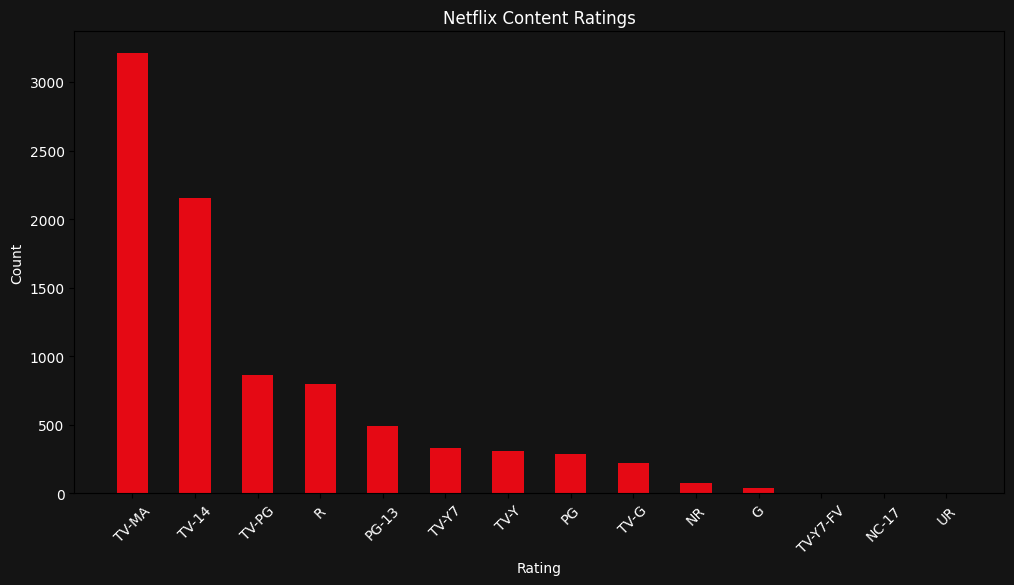

In [138]:
import matplotlib.pyplot as plt

Rating = df['rating'].value_counts()

plt.figure(figsize=(12,6), facecolor="#141414")
plt.bar(Rating.index, Rating.values, color="#E50914", width=0.5)

plt.title("Netflix Content Ratings", color="white")
plt.xlabel("Rating", color="white")
plt.ylabel("Count", color="white")

plt.xticks(rotation=45, color="white")
plt.yticks(color="white")
plt.gca().set_facecolor("#141414")

plt.show()


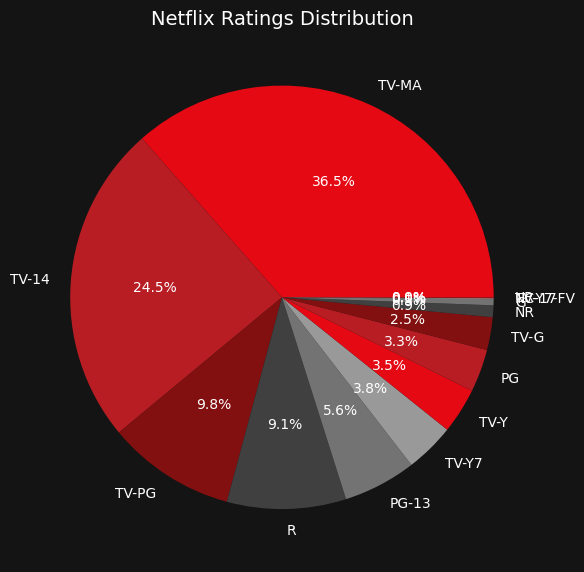

In [139]:
import matplotlib.pyplot as plt

Rating = df['rating'].value_counts()

plt.figure(figsize=(6,6), facecolor="#141414")

# نمودار دایره‌ای با رنگ‌های تیره و قرمز
plt.pie(
    Rating.values,
    labels=Rating.index,
    autopct='%1.1f%%',
    colors=["#E50914", "#B81D24", "#831010", "#404040", "#737373", "#999999"],  # طیف قرمز-خاکستری
    textprops={'color': 'white'}
)

plt.title("Netflix Ratings Distribution", color="white", fontsize=14)
plt.tight_layout()
plt.show()



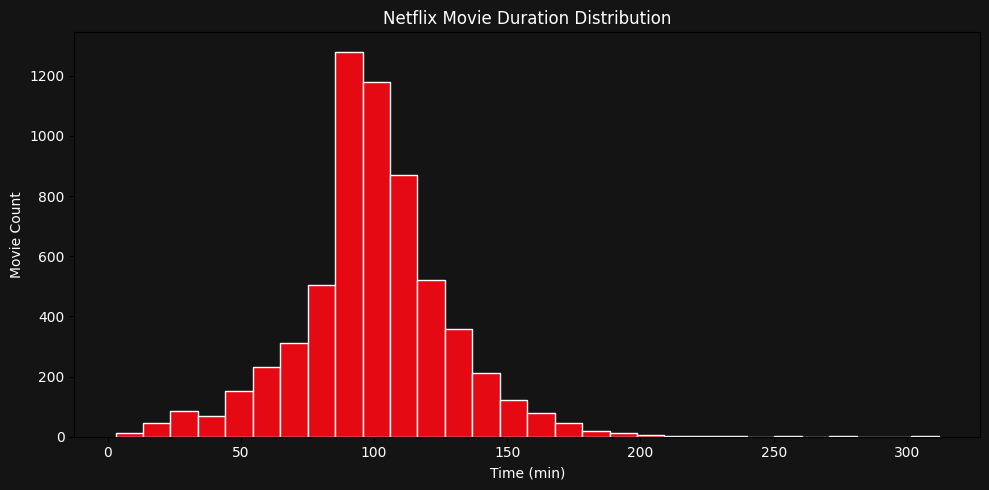

In [140]:

plt.figure(figsize=(10,5), facecolor="#141414")
plt.hist(movies['duration_int'], bins=30, color="#E50914", edgecolor="white")

plt.title('Netflix Movie Duration Distribution', color="white")
plt.xlabel('Time (min)', color="white")
plt.ylabel('Movie Count', color="white")

plt.xticks(color="white")
plt.yticks(color="white")
plt.gca().set_facecolor("#141414")

plt.tight_layout()
plt.show()



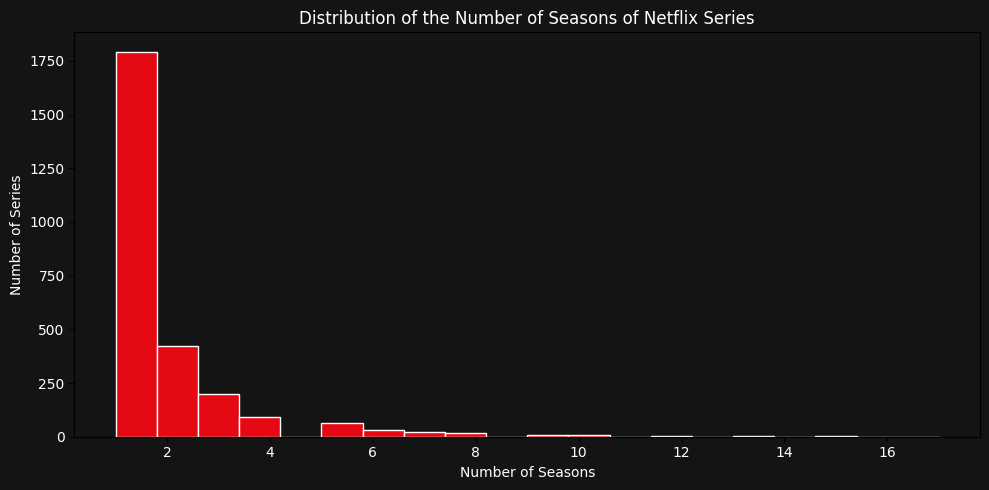

In [141]:

shows = df[df['type'] == 'TV Show']

plt.figure(figsize=(10,5), facecolor="#141414")
plt.hist(shows['duration_int'], bins=20, color="#E50914", edgecolor="white")

plt.title('Distribution of the Number of Seasons of Netflix Series', color="white")
plt.xlabel('Number of Seasons', color="white")
plt.ylabel('Number of Series', color="white")

plt.xticks(color="white")
plt.yticks(color="white")
plt.gca().set_facecolor("#141414")

plt.tight_layout()
plt.show()



In [142]:
Rating_Type=df.groupby(['type','rating']).size().unstack(fill_value=0)


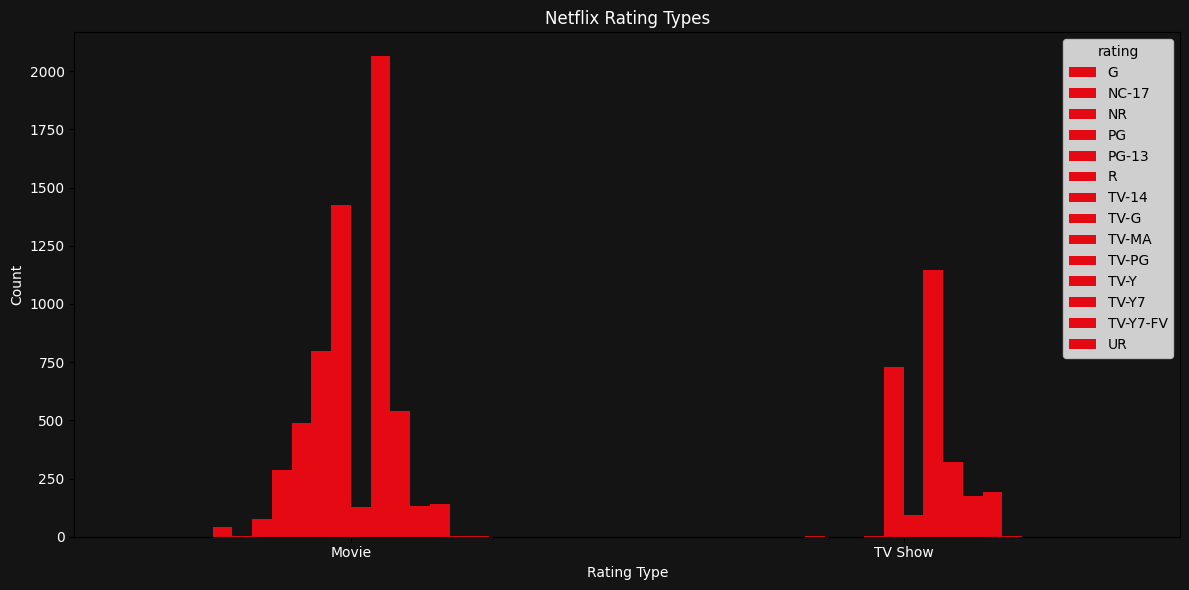

In [143]:


Rating_Type.plot(kind='bar', figsize=(12,6), color="#E50914")

plt.title("Netflix Rating Types", color="white")
plt.xlabel("Rating Type", color="white")
plt.ylabel("Count", color="white")

plt.xticks(rotation=0, color="white")
plt.yticks(color="white")

plt.gca().set_facecolor("#141414")
plt.gcf().set_facecolor("#141414")

plt.tight_layout()
plt.show()



<Figure size 1200x500 with 0 Axes>

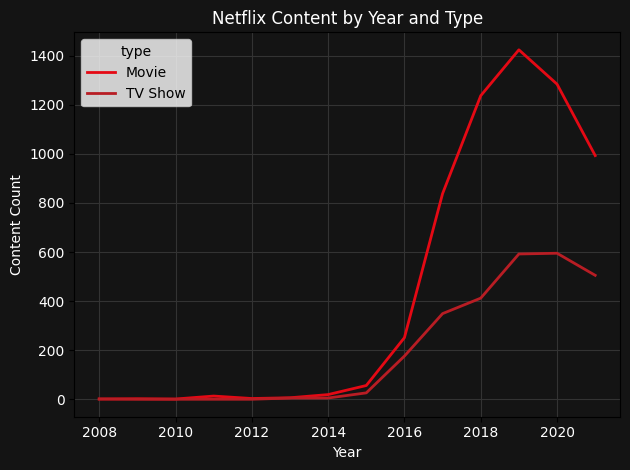

In [144]:


YearType = df.groupby(['added_year', 'type']).size().unstack(fill_value=0)

plt.figure(figsize=(12,5), facecolor="#141414")
YearType.plot(kind='line', color=["#E50914", "#B81D24"], linewidth=2)

plt.title("Netflix Content by Year and Type", color="white")
plt.xlabel("Year", color="white")
plt.ylabel("Content Count", color="white")

plt.xticks(color="white")
plt.yticks(color="white")

plt.grid(True, color="#333333")
plt.gca().set_facecolor("#141414")
plt.gcf().set_facecolor("#141414")

plt.tight_layout()
plt.show()
